# Polynomial Regression

In [62]:
# Importing the libraries to use.
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# Libraries to perform polynomial regression.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pd.options.mode.chained_assignment = None  # default='warn'

In [63]:
#Importing and printing the CSV dataset to work on.
dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"
df = pd.read_csv(dataset)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,12/14/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,12/13/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/11/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,12/10/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,3/25/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,3/24/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,3/23/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,3/22/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [64]:
# Extracting only the necessary columns to work on.
df = df[["dateRep", "cases", "deaths", "countriesAndTerritories"]]

 # Changing the date format of the dateRep column.
df["dateRep"]= pd.to_datetime(df["dateRep"])
df

,dateRep,cases,deaths,countriesAndTerritories
0,2020-12-14,746,6,Afghanistan
1,2020-12-13,298,9,Afghanistan
2,2020-12-12,113,11,Afghanistan
3,2020-12-11,63,10,Afghanistan
4,2020-12-10,202,16,Afghanistan
...,...,...,...,...
61895,2020-03-25,0,0,Zimbabwe
61896,2020-03-24,0,1,Zimbabwe
61897,2020-03-23,0,0,Zimbabwe
61898,2020-03-22,1,0,Zimbabwe


### Data Management: substituting negative values with zeros
Look at the **negativeValuesSubstitutions_LUCA.ipynb** notebook to read why this was done.

In [65]:
# Code to replace negative values in our dataframe with zeros.
i=0
while i<len(df):
    if(df['cases'][i] < 0):
        df['cases'][i] = 0
    
    if(df['deaths'][i] < 0):
        df['deaths'][i] = 0

    i+=1

In [66]:
start_date = '2020-03-01'
end_date = '2020-10-31'

# Retrieving the rows between the specified start and end dates for the specified countries to apply the regrssion on.
df_NZL = df[(df['countriesAndTerritories'] == 'New_Zealand') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_IND = df[(df['countriesAndTerritories'] == 'India') & ((df['dateRep'] >= '2020-03-01') & (df['dateRep'] <= '2020-05-31'))]

df_HRV = df[(df['countriesAndTerritories'] == 'Croatia') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_SEN = df[(df['countriesAndTerritories'] == 'Senegal') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]

df_SWE = df[(df['countriesAndTerritories'] == 'Sweden') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
df_BRA = df[(df['countriesAndTerritories'] == 'Brazil') & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]

# Randomly choosing one country from the dataframe to analyse.
# Stay in the while loop if the randomly selected country is one of the above six.
while True:
    country = str(df['countriesAndTerritories'].sample())
    # These next two lines is to extract the name of the random country.    
    country = country.replace('\n',' ')
    country = country.split()
    if((country[1] != 'New_Zealand') & (country[1] != 'India') & (country[1] != 'Croatia') & (country[1] != 'Senegal') & (country[1] != 'Sweden') & (country[1] != 'Brazil')):
        df_RND = df[(df['countriesAndTerritories'] == country[1]) & ((df['dateRep'] >= start_date) & (df['dateRep'] <= end_date))]
        print(country[1])
        break # Exit while loop.

Cote_dIvoire


# Applying the ML algorithm to answer specific objectives

### Polynomial regression for New Zealand

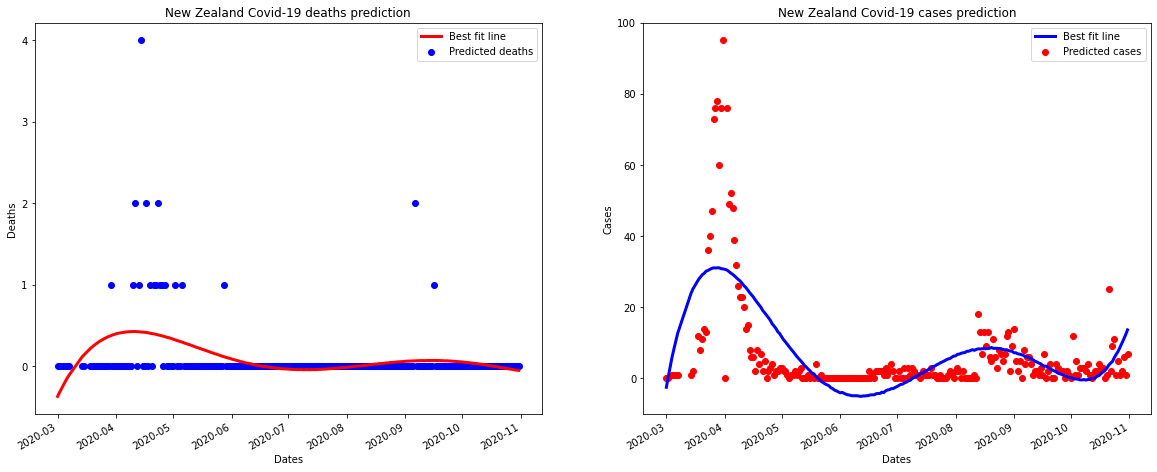

In [67]:
# Polynomial regression for New Zealand

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping New Zealand's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_NZL['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_NZL['dateRep'])) / 10e17).reshape(-1,1)
y = np.array(df_NZL['deaths']) # Assigning to y the values of New Zealand's deaths (dependent variable).

# Declaring a degree 6 polynomial regression.
poly_NZL = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_NZL = poly_NZL.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_NZL = LinearRegression()
model_NZL.fit(x_poly_NZL, y)
# Find the predicted model's response using the transformed x values.
y_poly_NZL = model_NZL.predict(x_poly_NZL)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("New Zealand Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_NZL, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly = ['New Zealand']
resultsPoly.append(round(model_NZL.score(x_poly_NZL,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_NZL['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_NZL['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_NZL['cases'])

poly_NZL = PolynomialFeatures(degree=6)
x_poly_NZL = poly_NZL.fit_transform(x)

model_NZL = LinearRegression()
model_NZL.fit(x_poly_NZL, y)
y_poly_NZL = model_NZL.predict(x_poly_NZL)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("New Zealand Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_NZL, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_NZL.score(x_poly_NZL,y),2))

### Polynomial regression for India

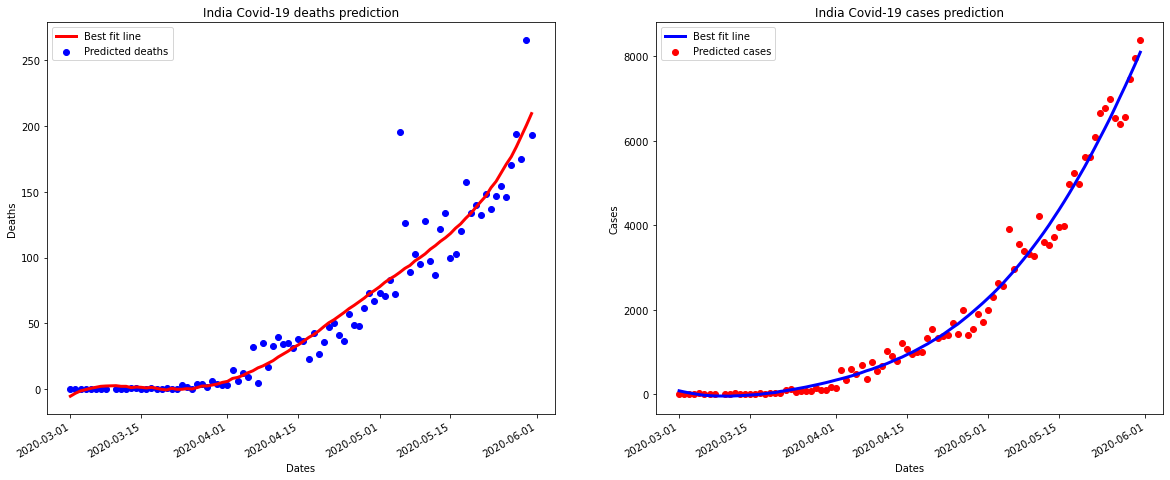

In [68]:
# Polynomial regression for India

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping India's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_IND['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_IND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_IND['deaths'])

# Declaring a degree 6 polynomial regression.
poly_IND = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_IND = poly_IND.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_IND = LinearRegression()
model_IND.fit(x_poly_IND, y)
# Find the predicted model's response using the transformed x values.
y_poly_IND = model_IND.predict(x_poly_IND)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("India Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_IND, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append('India')
resultsPoly.append(round(model_IND.score(x_poly_IND,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_IND['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_IND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_IND['cases'])

poly_IND = PolynomialFeatures(degree=6)
x_poly_IND = poly_IND.fit_transform(x)

model_IND = LinearRegression()
model_IND.fit(x_poly_IND, y)
y_poly_IND = model_IND.predict(x_poly_IND)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("India Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_IND, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_IND.score(x_poly_IND,y),2))

### Polynomial regression for Croatia

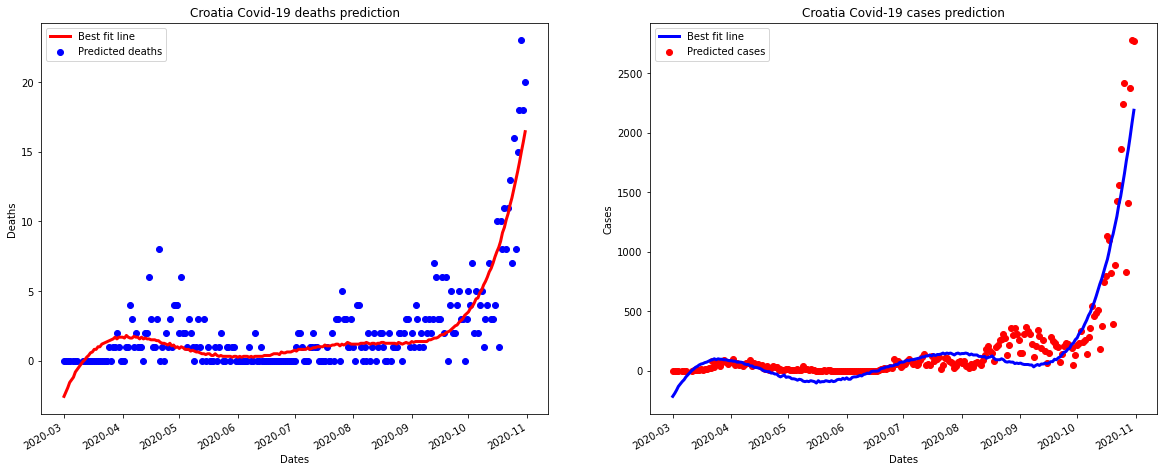

In [69]:
# Polynomial regression for Croatia

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping Croatia's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_HRV['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_HRV['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_HRV['deaths'])

# Declaring a degree 6 polynomial regression.
poly_HRV = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_HRV = poly_HRV.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_HRV = LinearRegression()
model_HRV.fit(x_poly_HRV, y)
# Find the predicted model's response using the transformed x values.
y_poly_HRV = model_HRV.predict(x_poly_HRV)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("Croatia Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_HRV, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append('Croatia')
resultsPoly.append(round(model_HRV.score(x_poly_HRV,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_HRV['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_HRV['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_HRV['cases'])

poly_HRV = PolynomialFeatures(degree=6)
x_poly_HRV = poly_HRV.fit_transform(x)

model_HRV = LinearRegression()
model_HRV.fit(x_poly_HRV, y)
y_poly_HRV = model_HRV.predict(x_poly_HRV)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("Croatia Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_HRV, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_HRV.score(x_poly_HRV,y),2))

### Polynomial regression for Senegal

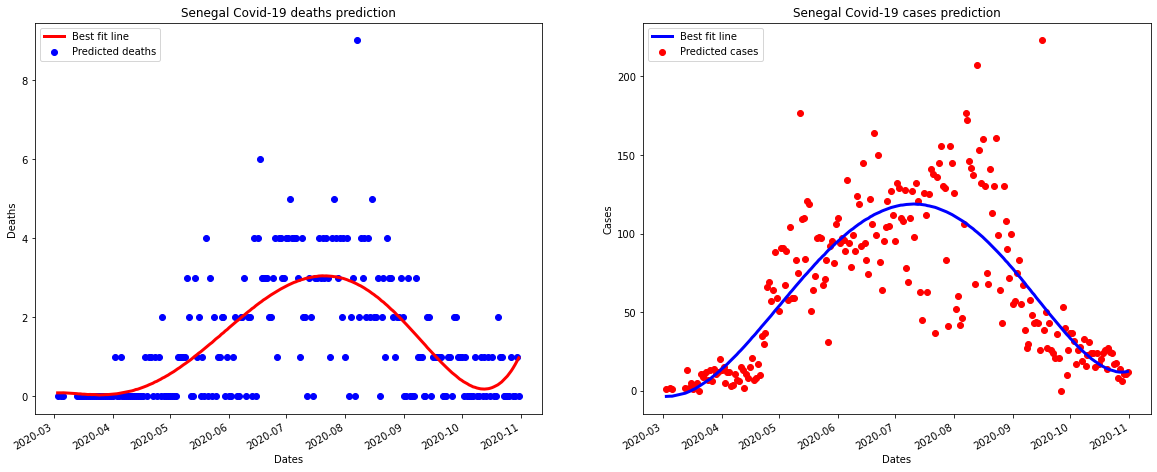

In [70]:
# Polynomial regression for Senegal

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping Senegal's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_SEN['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_SEN['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SEN['deaths'])

# Declaring a degree 6 polynomial regression.
poly_SEN = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_SEN = poly_SEN.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_SEN = LinearRegression()
model_SEN.fit(x_poly_SEN, y)
# Find the predicted model's response using the transformed x values.
y_poly_SEN = model_SEN.predict(x_poly_SEN)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("Senegal Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_SEN, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append('Senegal')
resultsPoly.append(round(model_SEN.score(x_poly_SEN,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_SEN['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SEN['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SEN['cases'])

poly_SEN = PolynomialFeatures(degree=6)
x_poly_SEN = poly_SEN.fit_transform(x)

model_SEN = LinearRegression()
model_SEN.fit(x_poly_SEN, y)
y_poly_SEN = model_SEN.predict(x_poly_SEN)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("Senegal Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_SEN, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_SEN.score(x_poly_SEN,y),2))

### Polynomial regression for Sweden

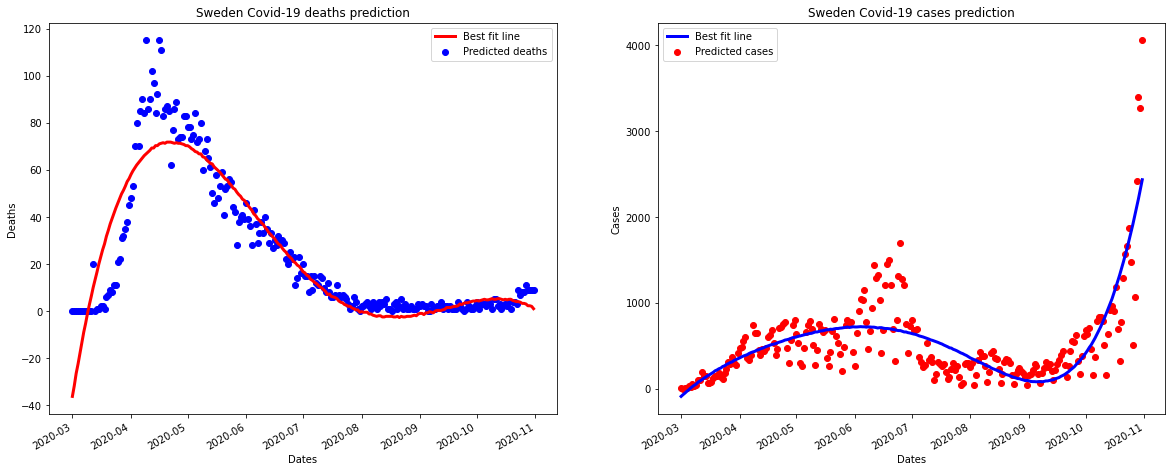

In [71]:
# Polynomial regression for Sweden

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping Croatia's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_SWE['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_SWE['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SWE['deaths'])

# Declaring a degree 6 polynomial regression.
poly_SWE = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_SWE = poly_SWE.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_SWE = LinearRegression()
model_SWE.fit(x_poly_SWE, y)
# Find the predicted model's response using the transformed x values.
y_poly_SWE = model_SWE.predict(x_poly_SWE)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("Sweden Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_SWE, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper right')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append('Sweden')
resultsPoly.append(round(model_SWE.score(x_poly_SWE,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_SWE['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_SWE['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_SWE['cases'])

poly_SWE = PolynomialFeatures(degree=6)
x_poly_SWE = poly_SWE.fit_transform(x)

model_SWE = LinearRegression()
model_SWE.fit(x_poly_SWE, y)
y_poly_SWE = model_SWE.predict(x_poly_SWE)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("Sweden Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_SWE, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_SWE.score(x_poly_SWE,y),2))

### Polynomial regression for Brazil

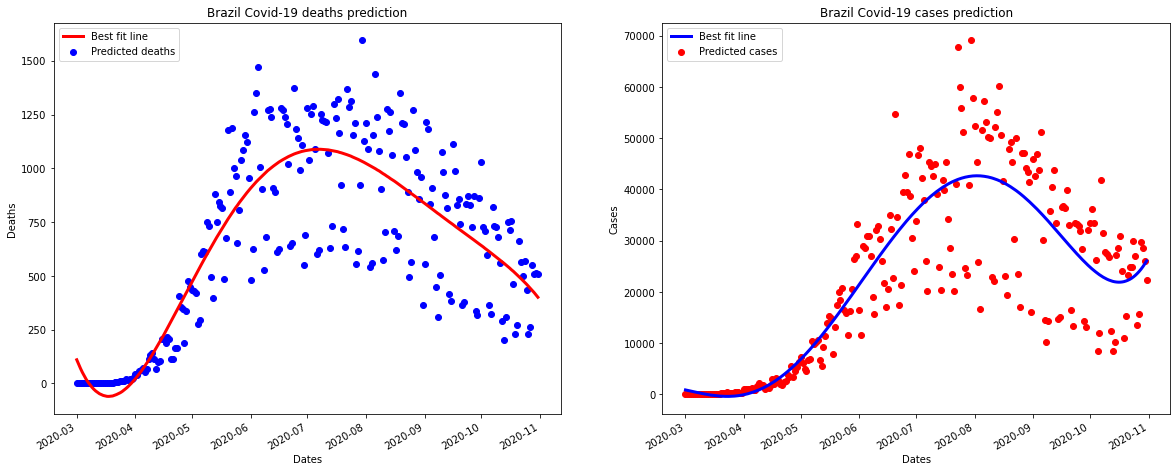

In [72]:
# Polynomial regression for Brazil

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping Croatia's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_BRA['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_BRA['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_BRA['deaths'])

# Declaring a degree 6 polynomial regression.
poly_BRA = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_BRA = poly_BRA.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_BRA = LinearRegression()
model_BRA.fit(x_poly_BRA, y)
# Find the predicted model's response using the transformed x values.
y_poly_BRA = model_BRA.predict(x_poly_BRA)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title("Brazil Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_BRA, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append('Brazil')
resultsPoly.append(round(model_BRA.score(x_poly_BRA,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_BRA['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_BRA['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_BRA['cases'])

poly_BRA = PolynomialFeatures(degree=6)
x_poly_BRA = poly_BRA.fit_transform(x)

model_BRA = LinearRegression()
model_BRA.fit(x_poly_BRA, y)
y_poly_BRA = model_BRA.predict(x_poly_BRA)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title("Brazil Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_BRA, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_BRA.score(x_poly_BRA,y),2))

### Polynomial Regression for random country

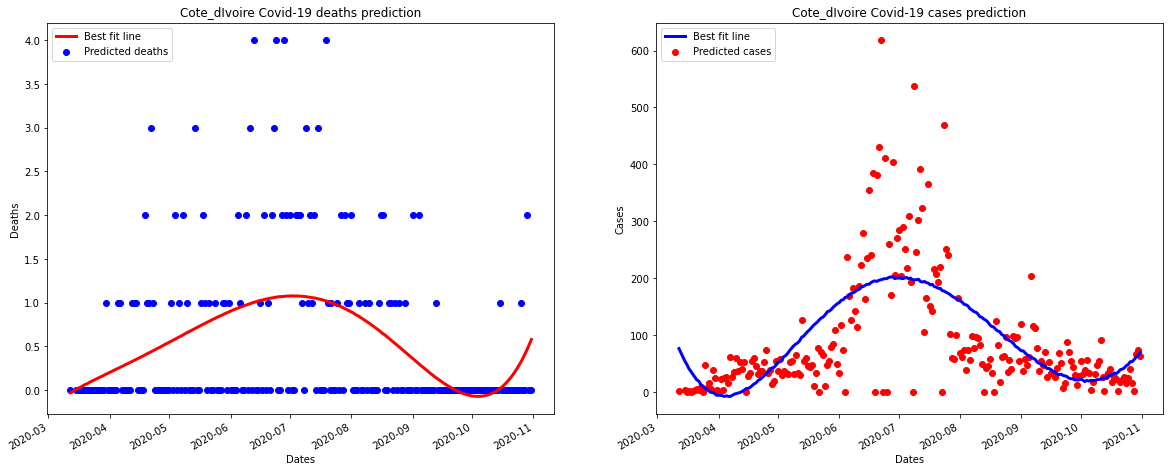

In [73]:
# Polynomial regression for random country

# Creating two subplots: first is dates vs deaths, second is cases vs deaths.
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)

# Polynomial regression for date vs deaths
# Shaping Croatia's dates column in a 2-D nx1 matrix (n = number of rows) and assigning it to x.
x_copy = np.array(df_RND['dateRep']).reshape(-1,1)
# Converting and scaling the dates (independent variable).
x = (np.array(pd.to_numeric(df_RND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_RND['deaths'])

# Declaring a degree 6 polynomial regression.
poly_RND = PolynomialFeatures(degree=6)
# Transforming the x values to have a degree 6, rather than 1, and fitting this to the polynomila regression
# model.
x_poly_RND = poly_RND.fit_transform(x)

# Create and fit a linear regression model with the transformed x values and y values.
model_RND = LinearRegression()
model_RND.fit(x_poly_RND, y)
# Find the predicted model's response using the transformed x values.
y_poly_RND = model_RND.predict(x_poly_RND)

plt.xlabel("Dates")
plt.ylabel("Deaths")
plt.title(country[1] + " Covid-19 deaths prediction")
# Make a scatter plot of the original reshaped x values (x_copy) vs the y values (deaths).
plt.scatter(x_copy,y, color='blue', label='Predicted deaths')
# Plot the 6 degree polynomial best fit line on the scatter plot.
plt.plot(x_copy, y_poly_RND, color='red', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

# Finding and saving the results of the Polynomial regression of the dates vs deaths plot.
resultsPoly.append(country[1])
resultsPoly.append(round(model_RND.score(x_poly_RND,y),2))

# Polynomial regression for date vs cases (SAME THING HAS BEEN DONE AS ABOVE ONLY USING THE CASES COLUMN).
plt.subplot(1,2,2)

x_copy = np.array(df_RND['dateRep']).reshape(-1,1)
x = (np.array(pd.to_numeric(df_RND['dateRep'])) / 10e17).reshape(-1,1) # convert and scale.
y = np.array(df_RND['cases'])

poly_RND = PolynomialFeatures(degree=6)
x_poly_RND = poly_RND.fit_transform(x)

model_RND = LinearRegression()
model_RND.fit(x_poly_RND, y)
y_poly_RND = model_RND.predict(x_poly_RND)

plt.xlabel("Dates")
plt.ylabel("Cases")
plt.title(country[1] + " Covid-19 cases prediction")
plt.scatter(x_copy,y, color='red', label='Predicted cases')
plt.plot(x_copy, y_poly_RND, color='blue', linewidth=3, label='Best fit line')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

resultsPoly.append(round(model_RND.score(x_poly_RND,y),2))

## Results for each polynomial regression

In [74]:
# Creating a table with all the values of each polynomial regression done. The table will contain:
# - Name of the country.
# - Coefficient of determination for the deaths (R^2 deaths) and cases (R^2 cases) polynomial regression.

# Re-shaphing the resultsPoly list (containing the wanted results of the polynomial regression) into a 7x3 matrix.
data = np.array(resultsPoly).reshape(7,3)

# Creating and printing the dataframe created with resultsPoly transformed into a 7x3 matrix.
results = pd.DataFrame(data = data, columns=['Country', 'R^2 deaths', 'R^2 cases'])
results

,Country,R^2 deaths,R^2 cases
0,New Zealand,0.14,0.46
1,India,0.93,0.99
2,Croatia,0.74,0.84
3,Senegal,0.49,0.65
4,Sweden,0.85,0.64
5,Brazil,0.73,0.74
6,Cote_dIvoire,0.18,0.44
